# Counting Circles & Ellipses

## cv2.SimpleBlobDetector_Params()

### Area
- `filterByArea`: فعال یا غیرفعال کردن فیلتر بر اساس مساحت.
- `minArea`: حداقل مساحت برای شناسایی بلا‌ب.
- `maxArea`: حداکثر مساحت برای شناسایی بلا‌ب.

### Circularity
- `filterByCircularity`: فعال یا غیرفعال کردن فیلتر بر اساس دایره‌ای بودن.
- `minCircularity`: حداقل میزان دایره‌ای بودن بلا‌ب (از ۰ تا ۱).
- `maxCircularity`: حداکثر میزان دایره‌ای بودن بلا‌ب (از ۰ تا ۱).

### Convexity
- `filterByConvexity`: فعال یا غیرفعال کردن فیلتر بر اساس تحدب.
- `minConvexity`: حداقل میزان تحدب بلا‌ب (از ۰ تا ۱).
- `maxConvexity`: حداکثر میزان تحدب بلا‌ب (از ۰ تا ۱).

### Inertia
- `filterByInertia`: فعال یا غیرفعال کردن فیلتر بر اساس نسبت لختی.
- `minInertiaRatio`: حداقل نسبت لختی بلا‌ب (از ۰ تا ۱).
- `maxInertiaRatio`: حداکثر نسبت لختی بلا‌ب (از ۰ تا ۱).

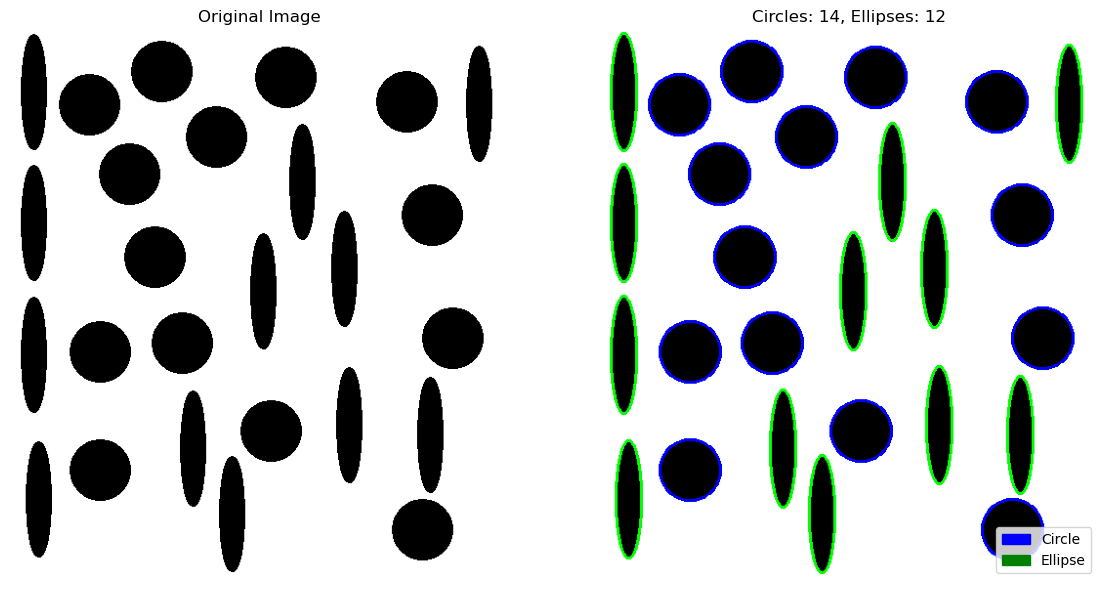

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('blobes.png')

thresh = cv2.adaptiveThreshold(
    cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 5
)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

ellipse_count = 0
circle_count = 0
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_result = img_color.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 800:  # filter small noise
        continue
    if len(cnt) >= 5:
        ellipse = cv2.fitEllipse(cnt)
        (x, y), (MA, ma), angle = ellipse
        ratio = min(MA, ma) / max(MA, ma)
        # Calculate circularity
        perimeter = cv2.arcLength(cnt, True)
        circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter > 0 else 0
        if ratio > 0.92 and circularity > 0.85:
            cv2.ellipse(img_result, ellipse, (255, 0, 0), 2)  # Blue for circles
            circle_count += 1
        else:
            cv2.ellipse(img_result, ellipse, (0, 255, 0), 2)  # Green for ellipses
            ellipse_count += 1

# Plotting with legend
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
axs[1].set_title(f'Circles: {circle_count}, Ellipses: {ellipse_count}')
axs[1].axis('off')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', edgecolor='blue', label='Circle'),
    Patch(facecolor='green', edgecolor='green', label='Ellipse')
]
axs[1].legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()


این کد با استفاده از کتابخانه‌های OpenCV و Matplotlib به طور خودکار دایره‌ها و بیضی‌ها را در یک تصویر شناسایی و شمارش می‌کند. روند کار به صورت زیر است:

1. **خواندن و پیش‌پردازش تصویر:**  
    تصویر ورودی خوانده شده و به فضای رنگی خاکستری تبدیل می‌شود. سپس با آستانه‌گذاری تطبیقی (adaptive thresholding)، تصویر به حالت باینری (سیاه و سفید) درمی‌آید تا اشیاء موجود بهتر قابل تفکیک باشند.

2. **استخراج کانتور‌ها:**  
    کانتورهای موجود در تصویر استخراج می‌شوند و نویزهای کوچک بر اساس مساحت حذف می‌گردند.

3. **تحلیل هندسی هر کانتور:**  
    برای هر کانتوری که تعداد نقاط کافی داشته باشد، یک بیضی برازش داده می‌شود. سپس نسبت قطرهای اصلی و فرعی (ratio) و میزان دایره‌ای بودن (circularity) آن محاسبه می‌شود:
    - اگر نسبت قطرها نزدیک به ۱ و دایره‌ای بودن بالا باشد، شکل به عنوان دایره شناسایی و با رنگ آبی نمایش داده می‌شود.
    - در غیر این صورت، به عنوان بیضی با رنگ سبز نمایش داده می‌شود.

4. **نمایش نتایج:**  
    تصویر اصلی و تصویر پردازش‌شده (با دایره‌ها و بیضی‌های مشخص‌شده) در کنار هم نمایش داده می‌شوند. تعداد دایره‌ها و بیضی‌ها نیز در عنوان تصویر پردازش‌شده ذکر شده است. همچنین یک راهنمای رنگی (legend) برای تشخیص دایره و بیضی به نمودار اضافه شده است.

این روش به صورت خودکار و بدون دخالت کاربر، اشکال هندسی ساده را در تصویر شناسایی، دسته‌بندی و شمارش می‌کند و نتیجه را به صورت بصری نمایش می‌دهد.